## Homework 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

### Exercise 4

(a) Since y and x are jointly distributed according to the normal distribution $p(x,y) = N(μ,Σ)$ and we know the means and the covariance matrix of x, y; we can easily compute $E[y|x]$:

$E[y|x]=μ_y +α \frac{σ_y}{σ_x}(x-μ_x)$, where $α=\frac{σ_{xy}}{σ_xσ_y}$

$α \frac{σ_y}{σ_x}=\frac{σ_{xy}}{σ_xσ_y}\frac{σ_y}{σ_x}=\frac{σ_{xy}}{{σ_x}^2}=0.5$

Thus, $E[y|x]=2+0.5(x-2)$, $E[y|x]=1+0.5x$



In [2]:
#value assignment to x and y based on the model that we came up with
x = np.arange(-5, 10, 1)
y_x = 1+0.5*x

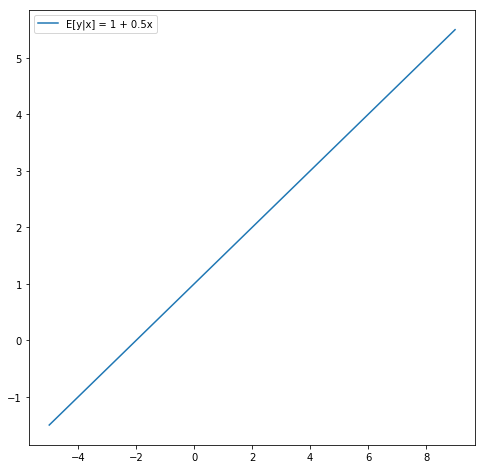

In [3]:
#plotting 𝐸[𝑦|𝑥]=1+0.5𝑥
plt.figure(figsize=(8, 8))
plt.plot(x, y_x, label="E[y|x] = 1 + 0.5x")
plt.legend()
plt.show()

(b) Generating 100 data sets of N=50 pairs, using the covariance and mean matrices

In [4]:
mean_matrix = [2, 2]
cov_matrix = [[3, 2],[2, 4]]
data_set = np.zeros((100, 50, 2))

for i in range(100):
    data_set[i,:,:] = np.random.multivariate_normal(mean_matrix, cov_matrix, 50)

Plotting 5 data sets and the E[y|x] line

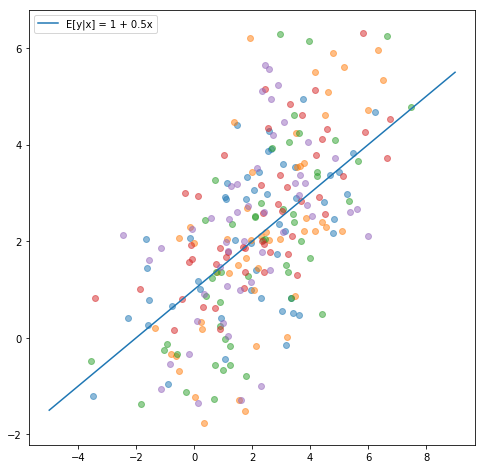

In [5]:
#plotting 5 data sets and the E[y|x] line
plt.figure(figsize=(8, 8))

for i in range(5):
    plt.scatter(data_set[i, :, 1], data_set[i, :, 0], alpha = 0.5)

plt.plot(x, y_x, label="E[y|x] = 1 + 0.5x")
plt.legend()
plt.show()

(c) Adopt the linear estimator $f(x;D)$ and determine its instances $f(x;D1),…, f(x;D100)$, utilizing the LS criterion

Function theta_calc models θ utilizing the LS criterion: $θ=(X^TX)^{-1}X^Ty$

In [6]:
#function for theta calculation
def theta_calc(X, y):
    #transpose matrix
    XT = X.transpose()

    #X transpose multiplied by X
    XTX = XT.dot(X)

    #inverse of XTX+lI
    invXTX = inv(XTX)

    #theta estimation
    theta_estimated = (invXTX.dot(XT)).dot(y)
    
    return theta_estimated

Computing theta for each data set and storing in a list

In [7]:
theta = []

for i in range(100):
    #adding column of ones to X data
    X = np.hstack((np.ones((50, 1)), data_set[i, :, 1].reshape(50, 1)))
    
    y = data_set[i, :, 0]
    
    #theta parameter calculation
    theta.append(theta_calc(X, y))

(d) Plot in a single figure 

    (i) the lines corresponding to the above 100 estimates (blue color) and 

    (ii) the line corresponding to the optimal MSE estimate (green color)

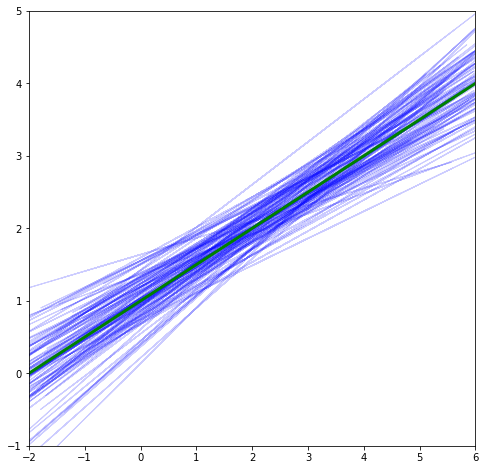

In [8]:
plt.figure(figsize=(8, 8))
plt.xlim((-2,6))
plt.ylim((-1,5))

#plot each data set with the estimation of theta
for i in range(len(theta)):
    plt.plot(data_set[i, :, 1], theta[i][0]+theta[i][1]*data_set[i, :, 1],
             color = "blue",
             linewidth = 1.0,
             alpha = 0.2)

#plot for optimal theta (random x values)
x = np.arange(-2, 7, 1)
plt.plot(x, 1+0.5*x,
             color = "green",
             linewidth = 3.0)

(e) Repeat for N = 5000

* Data gneration

In [9]:
mean_matrix = [2, 2]
cov_matrix = [[3, 2],[2, 4]]
data_set = np.zeros((100, 5000, 2))

for i in range(100):
    data_set[i,:,:] = np.random.multivariate_normal(mean_matrix, cov_matrix, 5000)

* theta computation

In [10]:
theta = []

for i in range(100):
    #adding column of ones to X data
    X = np.hstack((np.ones((5000, 1)), data_set[i, :, 1].reshape(5000, 1)))
    
    y = data_set[i, :, 0]
    
    #theta parameter calculation
    theta.append(theta_calc(X, y))

* Plot

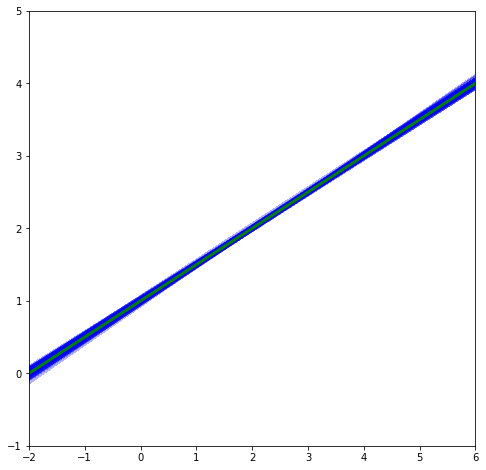

In [11]:
plt.figure(figsize=(8, 8))
plt.xlim((-2,6))
plt.ylim((-1,5))

#plot each data set with the estimation of theta
for i in range(len(theta)):
    plt.plot(data_set[i, :, 1], theta[i][0]+theta[i][1]*data_set[i, :, 1],
             color = "blue",
             linewidth = 1.0,
             alpha = 0.3)

#plot for optimal theta (random x values: whichever data set was chosen would give the exact same green line, 
#                        since the parameters are stable)
x = np.arange(-2, 7, 1)
plt.plot(x, 1+0.5*x,
             color = "green",
             linewidth = 3.0)

(f) When sample size increases from N=50 to N=5000, utilizing the diagrams shown before, we can detect that variance of estimator decreases.

### Exercise 5

Generating a set D of 𝑁 = 100 data pairs $z_n=(y_n,x_n)$

* x's come from uniform distribution in a range $(0,1)$

* y's come from uniform distribution in a range $(x^2,1)$

In [12]:
X = np.random.uniform(0, 1, 100)
y = np.random.uniform(X**2, 1, 100)

Data points plotted:

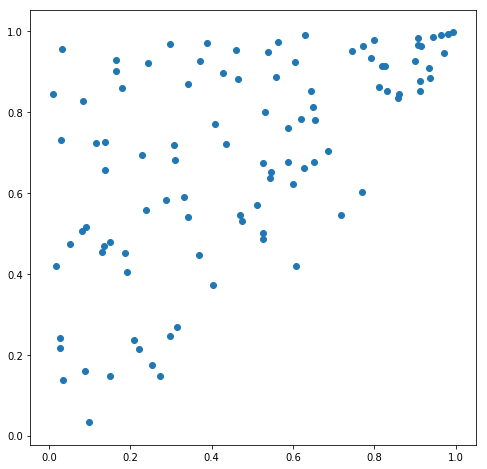

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y)

(a) For each $x_n$ compute the optimal MSE estimate $𝑦_𝑛, 𝑛 = 1,…,100$

In exercise 3 we found that $E[y|x] = \frac{x^2 +1 }{2}$. Based on that, for each x of our data set we will compute the optimal MSE estimate.

In [14]:
y_opt = []
for x in X:
    y_opt.append((x**2+1)/2)

Adding the optimal estimate to the previous diagram (green stars).

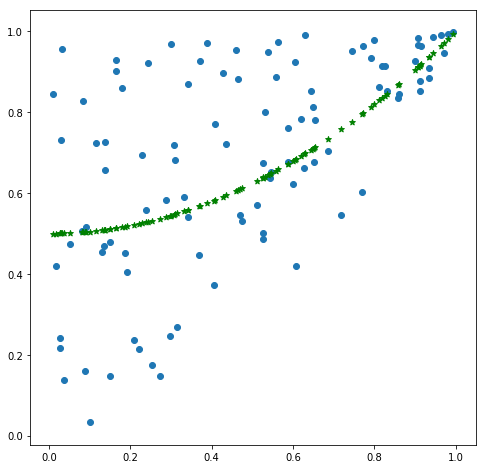

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y)
for i in range(len(X)):
    plt.scatter(X[i], y_opt[i], 
                color = "green",
                marker = "*")

(b) Compute $μ_x, μ_y, Σ$

* $μ_x$

In [16]:
mean_x = np.mean(X)
print("Mean of x is:", mean_x.round(4))

Mean of x is: 0.4699


* $μ_y$

In [17]:
mean_y = np.mean(y)
print("Mean of y is:", mean_y.round(4))

Mean of y is: 0.6901


* $Σ$

In [18]:
z = [X[0], y[0]]
for i in range(1, len(X)):
    z = np.vstack([z,[X[i],y[i]]])

In [19]:
m = np.array([mean_x, mean_y]).reshape(2,1)

In [20]:
sigma = 0
for n in range(len(z)):
    sigma+=((m-z[n].reshape(2,1)).dot((m-z[n].reshape(2,1)).transpose()))*(1/100)

In [21]:
print("Covariance matrix is:\n", sigma[0].round(4), "\n",  sigma[1].round(4))

Covariance matrix is:
 [0.0868 0.0443] 
 [0.0443 0.0652]


(c) Assuming that y and x are jointly distributed according to the normal distribution $p(x,y) = N(μ,Σ)$ and knowing the mean and covariance matrices of x, y; we can easily compute $E[y|x]$:

$E[y|x]=μ_y +α \frac{σ_y}{σ_x}(x-μ_x)$, where $α=\frac{σ_{xy}}{σ_xσ_y}$

$α \frac{σ_y}{σ_x}=\frac{σ_{xy}}{σ_xσ_y}\frac{σ_y}{σ_x}=\frac{σ_{xy}}{{σ_x}^2}=\frac{0.0388}{0.0642}=0.6043$

Thus, $E[y|x]=0.6693+0.6043(x-0.4841)$

Now, let's calculate $y$ based on that formula:

In [22]:
y_normal = []
for x in X:
    y_normal.append(0.6693 + 0.6043 * (x - 0.4841))

Plotting the data set, the optimal estimates of $y$ (green stars) and the "normal distribution hypothesis" estimates of $y$ (red crosses)

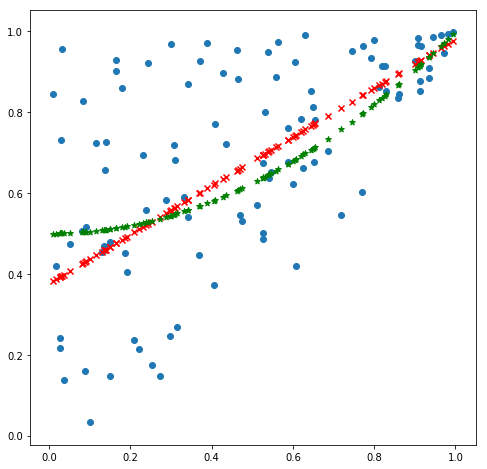

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y)
for i in range(len(X)):
    plt.scatter(X[i], y_normal[i], color = "red", marker = "x")
for i in range(len(X)):
    plt.scatter(X[i], y_opt[i], color = "green", marker = "*")

(d) Observing the previous diagram we can see that the optimal estimate follows the general shape of the data (the $x^2$ curvy line), whereas the normal distribution hypothesis one assumes a linear relationship between the dependent and independent variables.